In [1]:
import pandas as pd
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

/home/franel/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/franel/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# import de l'échantillon et des informations relatives aux cours
data = pd.read_csv('bag_of_words.csv', index_col = 0)
courses_info = pd.read_csv('courses_info.csv',index_col = 0)

In [3]:
# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

In [4]:
data.head(10)

,aaaa,abandonner,abattement,abbr,abc,abondement,abonnement,abonner,abonnés,aborder,...,évoqué,évoquées,évoqués,évènement,évènements,événement,événements,êtres,œil,œuvre
Concevez des architectures Big Data,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000469,0.000000,0.000000,0.000000
Apprenez à coder avec JavaScript,0.000000,0.0,0.0,0.0,0.000499,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0001,0.000000,0.000000,0.000000,0.000000,0.000000
Concevez votre site web avec PHP et MySQL,0.000524,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000058,...,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000087,0.000000
Réussir sa campagne d'e-mailing avec MailChimp,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.020408,0.020408,0.000000,...,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
Utilisez des modèles supervisés non linéaires,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.000325,0.000000,0.000651
Animez une communauté Facebook,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
Classez et segmentez des données visuelles,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000136
Gérez votre projet informatique facilement !,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0000,0.000294,0.000000,0.000294,0.000000,0.000883
Créez votre Data Lake,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000462,...,0.000231,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
Découvrez le fonctionnement des algorithmes,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000224,0.000000,0.000000,0.000000


In [5]:
courses_info.head(10)

,charge-e-de-gestion-des-ressources-humaines,manager-rh,gestionnaire-de-paie,data-architect,developpeur-se-dapplication-python,developpeur-web-junior,community-manager,responsable-marketing-operationnel,developpeur-se-d-application-php-symfony,data-scientist,expert-e-en-strategie-marketing-et-communication,data-analyst,theme
title,,,,,,,,,,,,,
Apprenez à gérer les conflits,True,True,True,False,False,False,False,False,False,False,False,False,RH
Réalisez des calculs distribués sur des données massives,False,False,False,True,False,False,False,False,False,False,False,False,data
Managez une équipe au quotidien,False,True,False,False,False,False,False,False,False,False,False,False,RH
Gérez votre code avec Git et GitHub,False,False,False,False,True,True,False,False,False,False,False,False,dev
Lancez une campagne de publicité avec Google AdWords,False,False,False,False,False,False,True,True,False,False,False,False,marketing
Découvrez les solutions CMS,False,False,False,False,False,True,False,False,False,False,False,False,dev
Gérez un projet digital avec une méthodologie en cascade,False,False,False,False,False,False,True,True,True,False,False,False,multi-parcours
Mettez en place un système de veille informationnelle,True,True,True,False,False,False,False,True,False,False,False,False,RH & marketing
Programmez en orienté objet en PHP,False,False,False,False,False,True,False,False,True,False,False,False,dev


In [18]:
# préparation des données pour le clustering
X = data.values
names = data.index
print(names.shape)
print(X.shape)
print(data.shape)

(105,)
(105, 9343)
(105, 9343)


In [7]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [8]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

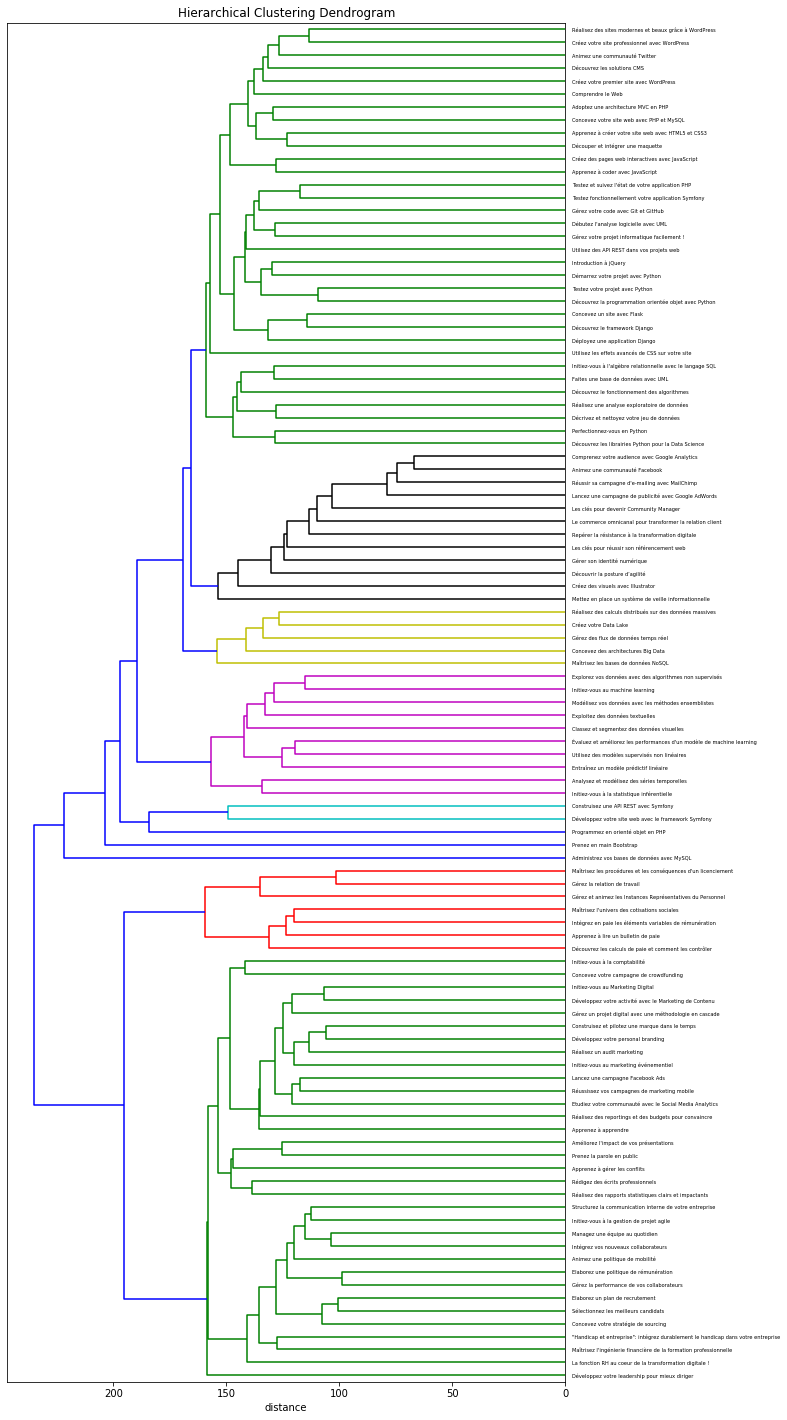

In [9]:
# Affichage du dendrogramme
plot_dendrogram(Z, names)

In [10]:
# Coupage du dendrogramme en 12 clusters
clusters = fcluster(Z, 12, criterion='maxclust')
#clusters = fcluster(Z, 159, criterion='distance') # ligne équivalente à la précédente

In [11]:
# Comparaison des clusters trouvés avec les classification des cours en différents thèmes
courses = pd.DataFrame({"theme": theme, "cluster": clusters, "title": names})
print(courses)
print(courses.pivot_table(index="theme", columns="cluster", aggfunc=len, fill_value=0))

         theme  cluster                                              title
0         data        7                Concevez des architectures Big Data
1          dev       10                   Apprenez à coder avec JavaScript
2          dev       10          Concevez votre site web avec PHP et MySQL
3    marketing        8     Réussir sa campagne d'e-mailing avec MailChimp
4         data        6      Utilisez des modèles supervisés non linéaires
..         ...      ...                                                ...
100         RH        2                Apprenez à lire un bulletin de paie
101         RH        3  Maîtrisez les procédures et les conséquences d...
102        dev       10         Utilisez des API REST dans vos projets web
103  marketing        1    Construisez et pilotez une marque dans le temps
104       data        9  Initiez-vous à l'algèbre relationnelle avec le...

[105 rows x 3 columns]
               title                                   
cluster           1 